In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.head()

# Survived : 1 = survived, 0 = dead)
# Pclass : 1 = 1st, 2 = 2nd ,3 = 3rd)
# SibSp : number of accompany with  sister, brother, and wife
# Patch : number of accompany with parents and children
# Embarked : port name(C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

def graph(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

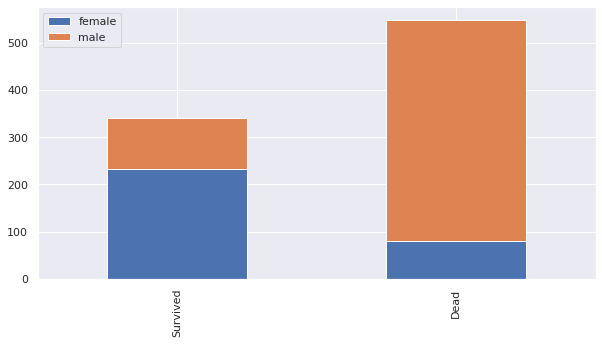

In [7]:
graph('Sex')

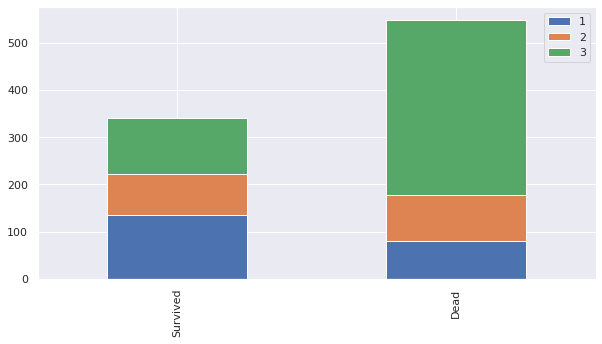

In [8]:
graph('Pclass')

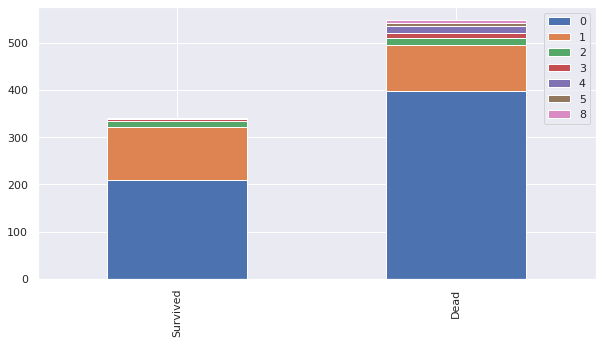

In [9]:
graph('SibSp')

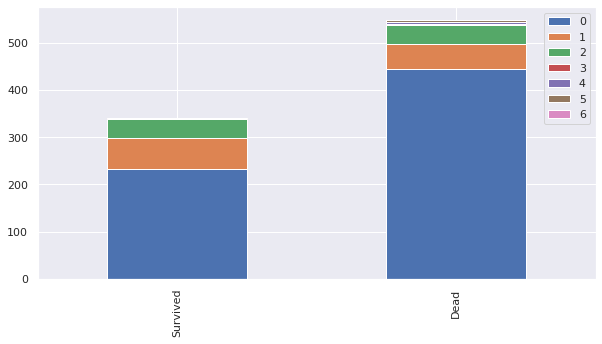

In [10]:
graph('Parch')

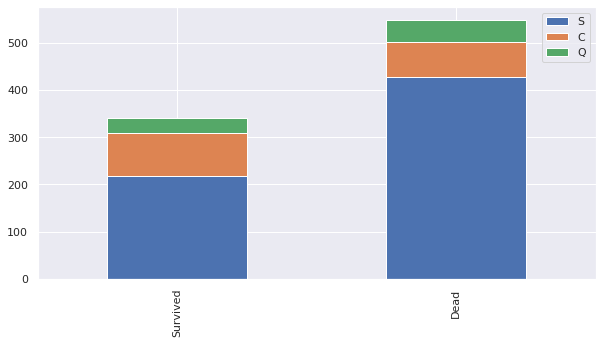

In [11]:
graph('Embarked')

In [12]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)

In [13]:
combine = [train, test]

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [16]:
# Name optimization
for dataset in combine:
    dataset['Sex_Name'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train['Sex_Name'], train['Sex'])

Sex,female,male
Sex_Name,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
# change all name to 'male' and 'female'
for dataset in combine:
    dataset['Sex_Name'] = dataset['Sex_Name'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Master', 'Mr', 'Rev', 'Sir', 'Dr'], 'male')
    dataset['Sex_Name'] = dataset['Sex_Name'].replace(['Countess', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms'], 'female')

In [18]:
pd.crosstab(train['Sex_Name'], train['Sex'])

Sex,female,male
Sex_Name,,
female,313,0
male,1,577


In [19]:
title_mapping= {'male': 0, 'female': 1}

for dataset in combine:
    dataset['Sex_Name'] = dataset['Sex_Name'].map(title_mapping)

sex_survived = train[['Sex_Name', 'Survived']].groupby(['Sex_Name'], as_index = False).mean()
sex_survived = sex_survived.set_index('Sex_Name', inplace = False)
sex_survived

train = train.drop(['Name', 'Sex'], axis = 1)
test = test.drop(['Name', 'Sex'], axis = 1)

In [20]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Name
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0


In [21]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Name
0,3,34.5,0,0,7.8292,Q,0.0
1,3,47.0,1,0,7.0000,S,1.0
2,2,62.0,0,0,9.6875,Q,0.0
3,3,27.0,0,0,8.6625,S,0.0
4,3,22.0,1,1,12.2875,S,1.0


In [22]:
# check nan data in train
train.isnull().sum()
# too many nan in 'Age'

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Sex_Name      0
dtype: int64

In [23]:
# check mean train data value
train_mean = pd.DataFrame(train.mean())

# fill mean 'Age' value
train['Age'] = train['Age'].fillna(float(train_mean.loc['Age']))

In [24]:
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Sex_Name    0
dtype: int64

In [25]:
# simplify 'Age' data
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Name,AgeGroup
0,0,3,22.0,1,0,7.2500,S,0,Student
1,1,1,38.0,1,0,71.2833,C,1,Adult
2,1,3,26.0,0,0,7.9250,S,1,Young Adult
3,1,1,35.0,1,0,53.1000,S,1,Young Adult
4,0,3,35.0,0,0,8.0500,S,0,Young Adult


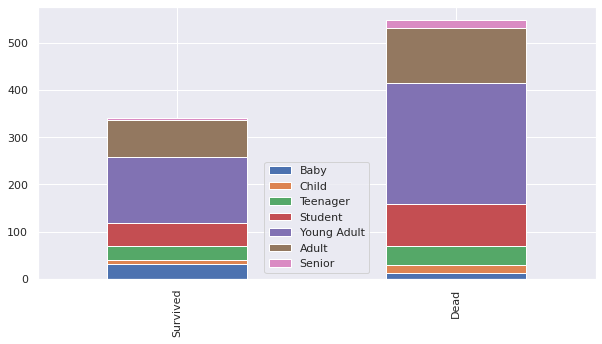

In [26]:
graph('AgeGroup')

In [27]:
age_title_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_title_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_title_mapping)

train = train.drop('Age', axis = 1)
test = test.drop('Age', axis = 1)

In [28]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex_Name,AgeGroup
0,0,3,1,0,7.2500,S,0,4
1,1,1,1,0,71.2833,C,1,6
2,1,3,0,0,7.9250,S,1,5
3,1,1,1,0,53.1000,S,1,5
4,0,3,0,0,8.0500,S,0,5


In [29]:
test.head()

,Pclass,SibSp,Parch,Fare,Embarked,Sex_Name,AgeGroup
0,3,0,0,7.8292,Q,0.0,5
1,3,1,0,7.0000,S,1.0,6
2,2,0,0,9.6875,Q,0.0,7
3,3,0,0,8.6625,S,0.0,5
4,3,1,1,12.2875,S,1.0,4


In [30]:
train['Fareband'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['Fareband'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [31]:
train.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex_Name,AgeGroup,Fareband
0,0,3,1,0,S,0,4,1
1,1,1,1,0,C,1,6,4
2,1,3,0,0,S,1,5,2
3,1,1,1,0,S,1,5,4
4,0,3,0,0,S,0,5,2


In [32]:
test.head()

,Pclass,SibSp,Parch,Embarked,Sex_Name,AgeGroup,Fareband
0,3,0,0,Q,0.0,5,1
1,3,1,0,S,1.0,6,1
2,2,0,0,Q,0.0,7,2
3,3,0,0,S,0.0,5,2
4,3,1,1,S,1.0,4,2


In [33]:
# check mean train data value
train_mean = pd.DataFrame(train.mean())
train_mean

,0
Survived,0.383838
Pclass,2.308642
SibSp,0.523008
Parch,0.381594
Sex_Name,0.351291


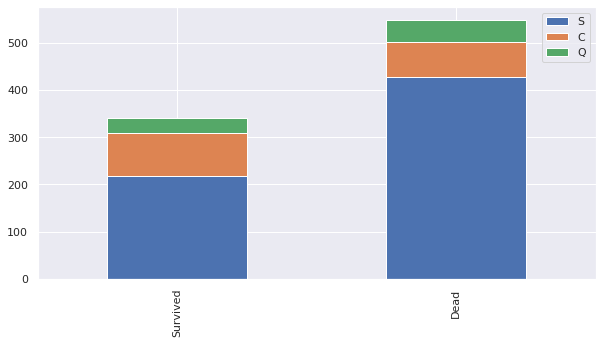

In [34]:
# check 'Embarked' data
graph('Embarked')

In [35]:
train.isnull().sum()
# 2 NAN data in Embarked
# most data is 'S' so fill nan to 'S'

Survived    0
Pclass      0
SibSp       0
Parch       0
Embarked    2
Sex_Name    0
AgeGroup    0
Fareband    0
dtype: int64

In [36]:
# Embarked optimization
southampton = train[train['Embarked'] == 'S'].shape[0]
cherbourg = train[train['Embarked'] == 'C'].shape[0]
queenstown = train[train['Embarked'] == 'Q'].shape[0]

train = train.fillna({'Embarked': 'S'})

train.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Embarked    0
Sex_Name    0
AgeGroup    0
Fareband    0
dtype: int64

In [37]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex_Name,AgeGroup,Fareband
0,0,3,1,0,1,0,4,1
1,1,1,1,0,2,1,6,4
2,1,3,0,0,1,1,5,2
3,1,1,1,0,1,1,5,4
4,0,3,0,0,1,0,5,2


In [38]:
train_dataset = train.drop('Survived', axis = 1)
target = train['Survived']

train_dataset.shape, target.shape

((891, 7), (891,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [40]:
scoring = 'accuracy'
score = cross_val_score(RandomForestClassifier(n_estimators = 13), train_dataset, target, cv = kfold, n_jobs = 1, scoring = scoring)

score

array([0.8       , 0.82022472, 0.73033708, 0.80898876, 0.79775281,
       0.80898876, 0.79775281, 0.80898876, 0.78651685, 0.82022472])

In [41]:
round(np.mean(score)*100, 2)

79.8